In [1]:
# imports 
import emp_preprocessing as ep
import emp_fake_data as ef
import emp_metrics as em
import networkx as nx
import functions as fct
import numpy as np
import pandas as pd
import parameters as par
from graphics import ClassGraphics

# parameters
path_results = "./results/empirical_results/"
Graphics = ClassGraphics(None,plot_period=1000)

# 1 data preprocessing

In [2]:
# load fake data (exposure)
df_exposures = ef.get_df_exposures(lines=int(1e5))
dic_rev_repo_exp_adj = ep.build_from_exposures(df_exposures=df_exposures,path=f"{path_results}data/")

# build finrep data @NA: add here a read csv of the data with the total assets
df_finrep = ef.get_df_finrep()

 96%|█████████▌| 96191/100000 [00:31<00:01, 3062.82it/s]

In [ ]:
# pickle (faster)
dic_rev_repo_exp_adj = ep.load_dic_obs_matrix_reverse_repo(path=f"{path_results}data/")
df_finrep = ef.get_df_finrep()

# 2 metrics measurement

## 2.1 accounting view

In [ ]:
# build arr_total_assets
arr_total_assets = ep.build_arr_total_assets(df_finrep, f"{path_results}exposure_view/degree_per_asset/")

## 2.2. exposure view

In [ ]:
fct.init_path(f"{path_results}exposure_view/")

In [ ]:
# get aggregated adjency matrices
dic_arr_binary_adj = ep.build_rolling_binary_adj(dic_rev_repo_exp_adj=dic_rev_repo_exp_adj,path=f"{path_results}data/")

In [ ]:
# pickle (faster)
dic_arr_binary_adj = ep.load_dic_arr_binary_adj(path=f"{path_results}data/")

### 2.2.1 jaccard

In [ ]:
days = list(dic_rev_repo_exp_adj.keys())

# get jaccard
df_jaccard = em.get_rev_repo_exposure_stats(dic_arr_binary_adj, days, path=path_results)
Graphics.plot_trajectory(
            df=df_jaccard,
            cols=[
                f"jaccard index-{agg_period}" for agg_period in par.agg_periods
            ],
            title="Jaccard index",
            file_name=f"{path_results}exposure_view/jaccard_index.pdf")

get jaccard


100%|██████████| 20833/20833 [00:04<00:00, 4346.82it/s]


### 2.2.2 density

In [ ]:
days = list(dic_rev_repo_exp_adj.keys())

# get density
df_density = em.get_density(dic_arr_binary_adj, days, path=path_results)
Graphics.plot_trajectory(
            df=df_density,
            cols=[
                f"network density-{agg_period}"
                for agg_period in par.agg_periods
            ],
            title="Network density",
            file_name=f"{path_results}exposure_view/network_density.pdf",
        )

get density


100%|██████████| 20833/20833 [00:04<00:00, 4448.13it/s]


### 2.2.3 degree distribution 

In [ ]:
days = list(dic_rev_repo_exp_adj.keys())

# get degree distribution
dic_in_degree, dic_out_degree, dic_degree = em.get_degree_distribution(dic_arr_binary_adj, path=f"{path_results}degree_distribution/")
Graphics.plot_degree_distribution(dic_in_degree,
    dic_out_degree,
    days,
    f"{path_results}exposure_view/degree_distribution/")


get degree distribution


100%|██████████| 20834/20834 [00:11<00:00, 1875.28it/s]


### 2.2.4 av. degree

In [ ]:
days = list(dic_rev_repo_exp_adj.keys())

# get av. degree
df_av_degree = em.get_av_degree(dic_degree, days, path=path_results)
Graphics.plot_trajectory(
            df=df_av_degree,
            cols=[
                f"av. degree-{agg_period}" for agg_period in par.agg_periods
            ],
            title="Av. degree",
            file_name=f"{path_results}exposure_view/average_degree.pdf",
        )

get av. degree


100%|██████████| 20833/20833 [00:04<00:00, 4225.29it/s]


### 2.2.5 degree per asset

In [ ]:
days = list(dic_rev_repo_exp_adj.keys())
bank_ids = list(dic_rev_repo_exp_adj.values())[0].index

# select the days and banks (common between the 2 lists)
finrep_days = list(df_finrep["date"])
finrep_bank_ids = list(set(df_finrep["lei"]))
plot_days = fct.list_intersection(days, finrep_days)

# plot
Graphics.plot_degree_per_asset(arr_total_assets,dic_degree,bank_ids,days,f"{path_results}exposure_view/degree_per_asset/",plot_days=plot_days,finrep_days=finrep_days, finrep_bank_ids=finrep_bank_ids)

### 2.2.6 core periphery

In [ ]:
arr_rev_repo_exp_adj = ep.convert_dic_to_array(dic_rev_repo_exp_adj)
days = list(dic_rev_repo_exp_adj.keys())

# run cp tests
Graphics.plot_cp_test(dic_arr_binary_adj, algos=par.cp_algos,days=days, path_results=f"{path_results}exposure_view/", opt_agg=True)
Graphics.plot_cp_test(arr_rev_repo_exp_adj, algos=par.cp_algos, days=days, path_results=f"{path_results}exposure_view/", opt_agg=False)

run core-periphery tests
core-periphery tests using the Rombach approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 192.10it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1058.35it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1057.92it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1059.15it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1058.76it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 907.98it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 855.59it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1008.21it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1001.70it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1014.60it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1010.57it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1058.86it/s]

test on day 2052-11-08 00:00:00

100%|██████████| 100/100 [00:00<00:00, 846.82it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1014.24it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1075.55it/s]

test on day 2061-01-25 00:00:00

100%|██████████| 100/100 [00:00<00:00, 1012.34it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1061.38it/s]

test on day 2066-07-18 00:00:00



100%|██████████| 100/100 [00:00<00:00, 1069.75it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1059.72it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 927.74it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1060.91it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1040.78it/s]


core-periphery tests using the Rossa approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 599.40it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 558.56it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 572.81it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 568.80it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 571.88it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 560.07it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 561.29it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 559.52it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 561.62it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 573.08it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 562.01it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 573.42it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 570.31it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 562.85it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 570.63it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 557.92it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 561.18it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.21it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 138.93it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 551.13it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 565.05it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 553.15it/s]


core-periphery tests using the LapSgnCore approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 610.44it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 564.58it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 563.92it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 565.57it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 568.41it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.61it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 571.83it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 567.73it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.56it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 573.50it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.50it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 570.69it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 573.49it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.00it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 570.43it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 567.84it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 571.57it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 572.21it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 571.07it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 569.50it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 567.79it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 567.16it/s]


core-periphery tests using the MINRES approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:01<00:00, 50.83it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:02<00:00, 36.30it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.05it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.21it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:02<00:00, 33.43it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.10it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:03<00:00, 33.21it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.62it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:02<00:00, 33.82it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.96it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.46it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:02<00:00, 34.23it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.32it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.86it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:02<00:00, 33.94it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:03<00:00, 32.13it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.90it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:02<00:00, 33.38it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:03<00:00, 32.77it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:02<00:00, 33.43it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.05it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:02<00:00, 35.81it/s]


core-periphery tests using the Lip approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 3775.05it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2873.83it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2640.53it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2664.74it/s]


test on day 2030-12-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2780.21it/s]


test on day 2033-09-09 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2838.94it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2789.67it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2822.96it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2745.20it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2844.70it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2747.08it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2845.20it/s]


test on day 2052-11-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2926.22it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2768.59it/s]


test on day 2058-05-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2768.81it/s]


test on day 2061-01-25 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2881.32it/s]


test on day 2063-10-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 125.45it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2810.84it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2730.35it/s]


test on day 2072-01-08 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2720.45it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2683.36it/s]


test on day 2077-01-14 00:00:00


100%|██████████| 100/100 [00:00<00:00, 2687.54it/s]


core-periphery tests using the BE approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1723.63it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1109.85it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1101.44it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1084.38it/s]

test on day 2030-12-14 00:00:00

100%|██████████| 100/100 [00:00<00:00, 1120.16it/s]

test on day 2033-09-09 00:00:00



100%|██████████| 100/100 [00:00<00:00, 1067.12it/s]


test on day 2036-06-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1140.90it/s]


test on day 2039-03-02 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1082.31it/s]


test on day 2041-11-26 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1109.35it/s]


test on day 2044-08-22 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1132.49it/s]


test on day 2047-05-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1118.16it/s]


test on day 2050-02-12 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1096.26it/s]

test on day 2052-11-08 00:00:00

100%|██████████| 100/100 [00:00<00:00, 1077.41it/s]


test on day 2055-08-05 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1094.77it/s]

test on day 2058-05-01 00:00:00

100%|██████████| 100/100 [00:00<00:00, 1070.94it/s]

test on day 2061-01-25 00:00:00

100%|██████████| 100/100 [00:00<00:00, 1097.57it/s]

test on day 2063-10-22 00:00:00



100%|██████████| 100/100 [00:00<00:00, 1088.59it/s]


test on day 2066-07-18 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1082.15it/s]


test on day 2069-04-13 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1085.81it/s]

test on day 2072-01-08 00:00:00



100%|██████████| 100/100 [00:00<00:00, 1093.89it/s]


test on day 2074-10-04 00:00:00


100%|██████████| 100/100 [00:00<00:00, 1088.37it/s]

test on day 2077-01-14 00:00:00



100%|██████████| 100/100 [00:00<00:00, 1072.49it/s]


core-periphery tests using the Rombach approach
test on day 2020-01-01 00:00:00


100%|██████████| 100/100 [00:00<00:00, 191.93it/s]


test on day 2022-09-27 00:00:00


100%|██████████| 100/100 [00:00<00:00, 107.08it/s]


test on day 2025-06-23 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.73it/s]


test on day 2028-03-19 00:00:00


100%|██████████| 100/100 [00:00<00:00, 106.38it/s]


## 2.3 transaction view

In [ ]:
fct.init_path(f"{path_results}transaction_view/")

# 3 tools

## 3.1 examples of density / histogram in log - log

### pareto law

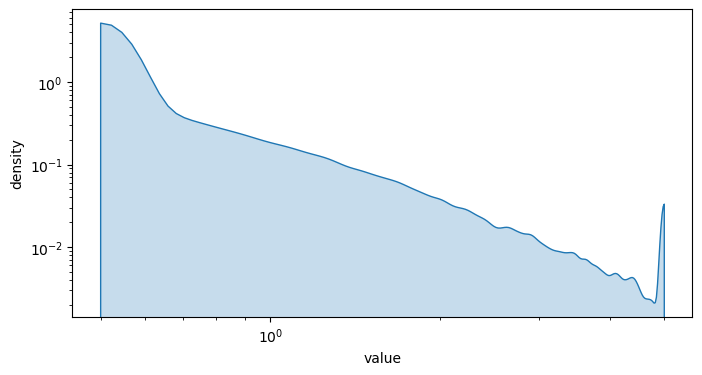

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
x = np.random.pareto(3,size=100000)

# Compute the absolute value and sign of the data
abs_x = np.abs(x)
sign_x = np.sign(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the KDE on a log scale with the transformed data
sns.kdeplot(x.clip(0.5,5), ax=ax, cut=0, fill=True)
ax.set_xscale('log')

# Set the y-axis to log scale
ax.set_yscale('log')

# Set axis labels
ax.set_xlabel('value')
ax.set_ylabel('density')

# Show the plot
plt.show()

### student law

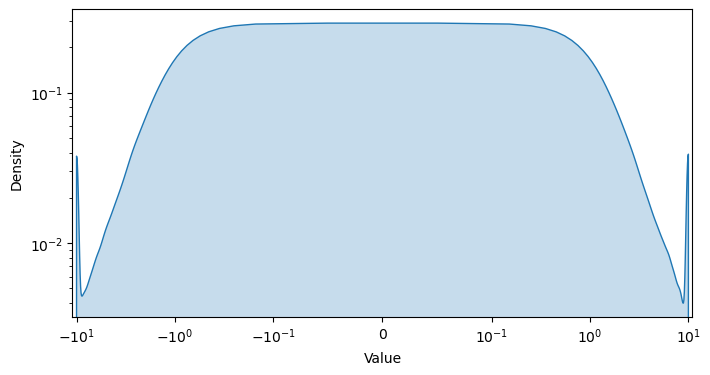

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate random data
x = np.random.standard_t(1,size=100000)

# Compute the absolute value and sign of the data
abs_x = np.abs(x)
sign_x = np.sign(x)

# Set up the figure
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the KDE on a log scale with the transformed data
sns.kdeplot(x.clip(-10,10), ax=ax, fill=True, cut=0)
ax.set_xscale('symlog', linthresh=0.1)

# Set the y-axis to log scale
ax.set_yscale('log')

# Set axis labels
ax.set_xlabel('Value')
ax.set_ylabel('Density')

# Show the plot
plt.show()

## 3.2 multiple histogram on the same plot

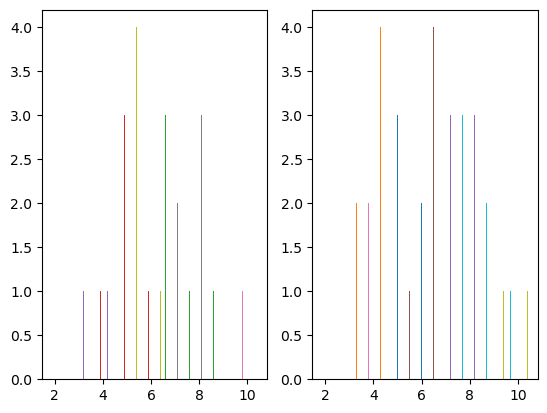

In [ ]:
from matplotlib import pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2)
pos = 0
width = 0.2
for  i in range(10):
    binary_adj = np.random.randint(0,2,(10,10))
    bank_network = nx.from_numpy_array(
                binary_adj,
                parallel_edges=False,
                create_using=nx.DiGraph,
            )  # first define a networkx object.
    ar_in_degree = np.array(bank_network.in_degree())[:,1]
    hist = np.unique(ar_in_degree, return_counts=True)
    ax1.bar(hist[0] + pos, hist[1], width=0.01)
    ax2.bar(hist[0] + pos, hist[1], width=0.01)
    pos = pos +width +0.1



## 3.3 power low fitting

Calculating best minimal value for power law fit
/mnt/live/user/vlecoz/conda_env/money_markets/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


2.7507191350766167
1.0644327833466374


<AxesSubplot: >

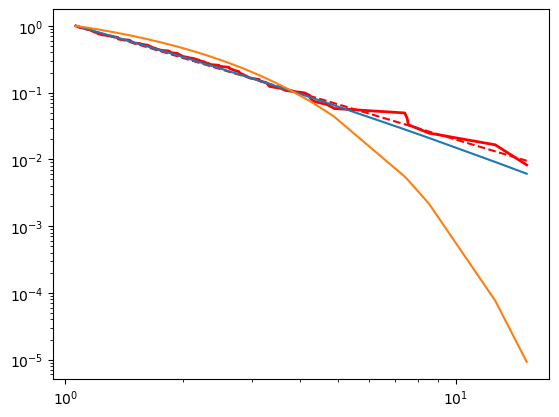

In [ ]:
# fitting
import powerlaw
import numpy as np
data = np.random.pareto(3,size=1000) # data can be list or numpy array
fit = powerlaw.Fit(data)
print(fit.power_law.alpha)
print(fit.power_law.xmin)
R, p = fit.distribution_compare('power_law', 'exponential')
fig2 = fit.plot_ccdf(color = "r", linewidth = 2)
fit.power_law.plot_ccdf(color = "r", linestyle = "--", ax = fig2)
fit.lognormal.plot_ccdf(ax=fig2)
fit.exponential.plot_ccdf(ax=fig2)